# Single Qubit Gates

In [1]:
# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import Aer, execute, visualization
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import sqrt 

## Rx Gate

<center><b>Rx($\theta$) Gate</center></b>
<center><b>$\theta$ degree rotation about x axis,</center></b>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> Rx($\theta$) Gate matrix</b></center>
$$Rx(\theta) =\begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2})   \\ -isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$
<br/>
<center><b>Derivation</b></center>
$$Rx(\theta) = e^{-\frac{i\theta X}{2}}$$

$$Rx(\theta) = cos(\frac{\theta}{2})I -isin(\frac{\theta}{2})X$$

$$Rx(\theta) = cos(\frac{\theta}{2})\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} -isin(\frac{\theta}{2})\begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}$$

$$Rx(\theta) =\begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2})   \\ -isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$
<br/>

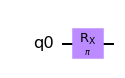

In [2]:
# Rx gate in quantum circuit when theta=pi
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rx(pi, q)
display(qc.draw(output="mpl"))

In [3]:
# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

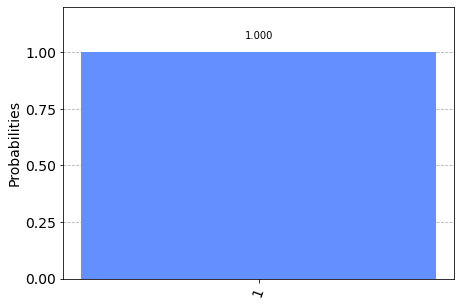

In [4]:
# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by example

#### Example 1
<center><b>Applying Rx gate on |0> where $\theta$ = $\pi$</b></center>
$$Rx(\pi)\ket{0} = \begin{bmatrix} 0 & -i   \\ -i & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Rx(\pi)\ket{0} = -i\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Rx(\pi)\ket{0} = -i\ket{1}$$

![SegmentLocal](bloch_transformations/rx1_gate.gif "segment")

In [5]:
zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("Initial State \n{}\n".format(zero_state))

rx_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rx_gate = np.matrix(rx_gate)
print("Rx Gate when theta=pi \n{}\n".format(rx_gate))

output = rx_gate*zero_state
print("Output State  \n{}\n".format(output))

Initial State 
[[1.+0.j]
 [0.+0.j]]

Rx Gate when theta=pi 
[[ 0.+0.j -0.-1.j]
 [ 0.-1.j  0.+0.j]]

Output State  
[[0.+0.j]
 [0.-1.j]]



#### Example 2
<center><b>Applying Rx gate on |1> where $\theta$ = $\pi$</b></center>
$$Rx(\pi)\ket{1} = \begin{bmatrix} 0 & -i   \\ -i & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Rx(\pi)\ket{1} = \begin{bmatrix} -i \\ 0\end{bmatrix}$$

$$Rx(\pi)\ket{1} = -i\ket{0}$$
<br/>

In [6]:
one_state = np.matrix([[0.+0.j],[1.+0.j]])
print("Initial State \n{}\n".format(one_state))

rx_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rx_gate = np.matrix(rx_gate)
print("Rx Gate when theta=pi\n{}\n".format(rx_gate))

output = rx_gate*one_state
print("Output State \n{}\n".format(output))

Initial State 
[[0.+0.j]
 [1.+0.j]]

Rx Gate when theta=pi
[[ 0.+0.j -0.-1.j]
 [ 0.-1.j  0.+0.j]]

Output State 
[[0.-1.j]
 [0.+0.j]]



<center><b>Note:</b></center>
$$Rx(\pi)\ket{0} = -i\ket{1} = \ket{1}\space (Global\space Phase \space can \space be \space ignored)$$
$$Rx(\pi)\ket{1} = -i\ket{0} = \ket{0}\space (Global\space Phase \space can \space be \space ignored)$$
<center><b>Rx($\pi$) is equivalent to X gate</b></center>
<br/>

#### Example 3
<center><b>Applying Rx gate on |0> where $\theta$ = $\frac{\pi}{2}$</b></center>
$$Rx(\frac{\pi}{2})\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -i   \\ -i & 1\end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Rx(\frac{\pi}{2})\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i\end{bmatrix}$$
<br/>

![SegmentLocal](bloch_transformations/rx2_gate.gif "segment")

In [7]:
# Rx gate in quantum circuit when theta=pi/2
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rx(pi/2, q)

zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("Initial State \n{}\n".format(zero_state))

rx_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rx_gate = np.matrix(rx_gate)
print("Rx Gate when theta=pi/2\n{}\n".format(rx_gate))

output = rx_gate*zero_state
print("Output State  \n{}\n".format(output))

Initial State 
[[1.+0.j]
 [0.+0.j]]

Rx Gate when theta=pi/2
[[ 0.707+0.j    -0.   -0.707j]
 [ 0.   -0.707j  0.707+0.j   ]]

Output State  
[[0.707+0.j   ]
 [0.   -0.707j]]



#### Example 4
<center><b>Applying Rx gate on |0> where $\theta$ = $\frac{\pi}{4}$</b></center>
$$Rx(\frac{\pi}{4})\ket{0} =\begin{bmatrix} 0.9238 & -i0.3827   \\ -i0.3827 & 0.9238\end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Rx(\frac{\pi}{4})\ket{0} = \begin{bmatrix} 0.9238 \\ -i0.3827\end{bmatrix}$$
<br/>

![SegmentLocal](bloch_transformations/rx3_gate.gif "segment")

In [8]:
# Rx gate in quantum circuit theta=pi/4
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rx(pi/4, q)

zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("Initial State  \n{}\n".format(zero_state))

rx_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rx_gate = np.matrix(rx_gate)
print("Rx Gate when theta=pi/4 \n{}\n".format(rx_gate))

output = rx_gate*zero_state
print("Output State \n{}\n".format(output))

Initial State  
[[1.+0.j]
 [0.+0.j]]

Rx Gate when theta=pi/4 
[[ 0.924+0.j    -0.   -0.383j]
 [ 0.   -0.383j  0.924+0.j   ]]

Output State 
[[0.924+0.j   ]
 [0.   -0.383j]]



<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$Rx(\theta)^\dagger =\begin{bmatrix} cos(\frac{\theta}{2}) & isin(\frac{\theta}{2})   \\ isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$

<center><b>Rx gate is Hermitian when the value of $\theta$ lets $$Rx(\theta) = Rx(\theta)^\dagger$$</b></center>
<br/>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$Rx(\theta)Rx(\theta)^\dagger = \begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2})   \\ -isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}\begin{bmatrix} cos(\frac{\theta}{2}) & isin(\frac{\theta}{2})   \\ isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$

$$Rx(\theta)Rx(\theta)^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$Rx(\theta)Rx(\theta)^\dagger = I$$
<center><b>Rx($\theta$) gate is Unitary</b></center>

$$Rx(\theta)^\dagger=Rx(\theta)^{-1}$$

## Ry Gate

<center><b>Ry($\theta$) Gate</center></b>
<center><b>$\theta$ degree rotation about y axis</center></b>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> Ry($\theta$) Gate matrix</b></center>
$$Ry(\theta) =\begin{bmatrix} cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2})   \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$
<br/>
<center><b>Derivation</b></center>
$$Ry(\theta) = e^{-\frac{i\theta Y}{2}}$$

$$Ry(\theta) = cos(\frac{\theta}{2})I -isin(\frac{\theta}{2})Y$$

$$Ry(\theta) = cos(\frac{\theta}{2})\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} -isin(\frac{\theta}{2})\begin{bmatrix} 0 & -i   \\ i & 0 \end{bmatrix}$$

$$Ry(\theta) =\begin{bmatrix} cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2})   \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$
<br/>

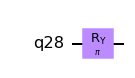

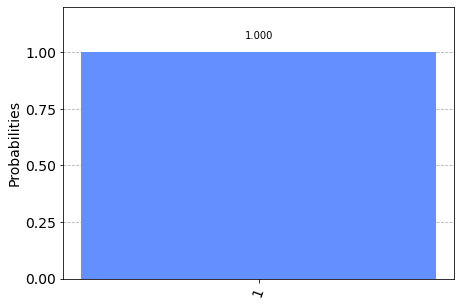

In [9]:
# Ry gate in quantum circuit when theta=pi
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.ry(pi, q)
display(qc.draw(output="mpl"))

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by example

#### Example 1
<center><b>Applying Ry gate on |0> where $\theta$ = $\pi$</b></center>
$$Ry(\pi)\ket{0} = \begin{bmatrix} 0 & -1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Ry(\pi)\ket{0} = \begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Ry(\pi)\ket{0} = \ket{1}$$

![SegmentLocal](bloch_transformations/ry1_gate.gif "segment")

In [10]:
zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("Initial State  \n{}\n".format(zero_state))

ry_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ry_gate = np.matrix(ry_gate)
print("Ry Gate when theta=pi \n{}\n".format(ry_gate))

output = ry_gate*zero_state
print("Output State \n{}\n".format(output))

Initial State  
[[1.+0.j]
 [0.+0.j]]

Ry Gate when theta=pi 
[[ 0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j]]

Output State 
[[0.+0.j]
 [1.+0.j]]



#### Example 2
<center><b>Applying Ry gate on |1> where $\theta$ = $\pi$</b></center>
$$Ry(\pi)\ket{1} = \begin{bmatrix} 0 & -1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Ry(\pi)\ket{1} = \begin{bmatrix} -1 \\ 0\end{bmatrix}$$

$$Ry(\pi)\ket{1} = -\ket{0}$$
<br/>

In [11]:
one_state = np.matrix([[0.+0.j],[1.+0.j]])
print("Initial State  \n{}\n".format(one_state))

ry_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ry_gate = np.matrix(ry_gate)
print("Ry Gate wheb theta=pi \n{}\n".format(ry_gate))

output = ry_gate*one_state
print("Output State \n{}\n".format(output))

Initial State  
[[0.+0.j]
 [1.+0.j]]

Ry Gate wheb theta=pi 
[[ 0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j]]

Output State 
[[-1.+0.j]
 [ 0.+0.j]]



<center><b>Note:</b></center>
$$Ry(\pi)\ket{0} = \ket{1} = \ket{1}\space (Global\space Phase \space can \space be \space ignored)$$
$$Ry(\pi)\ket{1} = -\ket{0} = \ket{0}\space(Global \space Phase \space can\space  be \space ignored)$$
<center><b>Ry($\pi$) is equivalent to Y gate</b></center>
<br/>

#### Example 3
<center><b>Applying Ry gate on |0> where $\theta$ = $\frac{\pi}{2}$</b></center>
$$Ry(\frac{\pi}{2})\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -1   \\ 1 & 1\end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Ry(\frac{\pi}{2})\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}$$

$$Ry(\pi)\ket{0} = \ket{+}$$
<center><b>Note: Ry($\frac{\pi}{2}$) is similar to H gate in terms of end result</b></center>
<br/>

![SegmentLocal](bloch_transformations/ry2_gate.gif "segment")

In [12]:
# Rx gate in quantum circuit when theta=pi/2
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.ry(pi/2, q)

zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("Initial State  \n{}\n".format(zero_state))

ry_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ry_gate = np.matrix(ry_gate)
print("Ry Gate when theta=pi/2 \n{}\n".format(ry_gate))

output = ry_gate*zero_state
print("Output State \n{}\n".format(output))

Initial State  
[[1.+0.j]
 [0.+0.j]]

Ry Gate when theta=pi/2 
[[ 0.707+0.j -0.707+0.j]
 [ 0.707+0.j  0.707+0.j]]

Output State 
[[0.707+0.j]
 [0.707+0.j]]



#### Example 4
<center><b>Applying Ry gate on |0> where $\theta$ = $\frac{\pi}{4}$</b></center>
$$Ry(\frac{\pi}{4})\ket{0} =\begin{bmatrix} 0.9238 & -0.3827   \\ 0.3827 & 0.9238\end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Ry(\frac{\pi}{4})\ket{0} = \begin{bmatrix} 0.9238 \\ 0.3827\end{bmatrix}$$
<br/>

![SegmentLocal](bloch_transformations/ry3_gate.gif "segment")

In [13]:
# Rx gate in quantum circuit when theta=pi/4
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.ry(pi/4, q)

zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("Initial State  \n{}\n".format(zero_state))

ry_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ry_gate = np.matrix(ry_gate)
print("Ry Gate when theta=pi/4 \n{}\n".format(ry_gate))

output = ry_gate*zero_state
print("Output State \n{}\n".format(output))

Initial State  
[[1.+0.j]
 [0.+0.j]]

Ry Gate when theta=pi/4 
[[ 0.924+0.j -0.383+0.j]
 [ 0.383+0.j  0.924+0.j]]

Output State 
[[0.924+0.j]
 [0.383+0.j]]




<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$Ry(\theta)^\dagger =\begin{bmatrix} cos(\frac{\theta}{2}) & sin(\frac{\theta}{2})   \\ -sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$

<center><b>Ry gate is Hermitian when the value of $\theta$ lets $$Ry(\theta) = Ry(\theta)^\dagger$$</b></center>
<br/>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$Ry(\theta)Ry(\theta)^\dagger = \begin{bmatrix} cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2})   \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}\begin{bmatrix} cos(\frac{\theta}{2}) & sin(\frac{\theta}{2})   \\ -sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix}$$

$$Ry(\theta)Ry(\theta)^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$Ry(\theta)Ry(\theta)^\dagger = I$$
<center><b>Ry($\theta$) gate is Unitary</b></center>

$$Ry(\theta)^\dagger=Ry(\theta)^{-1}$$

## Rz Gate

<center><b>Rz($\theta$) Gate</center></b>
<center><b>$\theta$ degree rotation about z axis,</center></b>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> Rz($\theta$) Gate matrix</b></center>
$$Rz(\theta) =\begin{bmatrix} cos(\frac{\theta}{2})-isin(\frac{\theta}{2}) & 0  \\ 0 & cos(\frac{\theta}{2})+isin(\frac{\theta}{2})  \end{bmatrix}$$
<br/>
<center><b>Derivation</b></center>
$$Rz(\theta) = e^{-\frac{i\theta Z}{2}}$$

$$Rz(\theta) = cos(\frac{\theta}{2})I -isin(\frac{\theta}{2})Z$$

$$Rz(\theta) = cos(\frac{\theta}{2})\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} -isin(\frac{\theta}{2})\begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}$$

$$Rz(\theta) =\begin{bmatrix} cos(\frac{\theta}{2})-isin(\frac{\theta}{2}) & 0  \\ 0 & cos(\frac{\theta}{2})+isin(\frac{\theta}{2})  \end{bmatrix}$$
<br/>

<center><b>Rz($\pi$) is equivalent to Z gate</b></center>
<center><b>Rz($\frac{\pi}{2}$) is equivalent to S gate</b></center>
<center><b>Rz($\frac{\pi}{4}$) is equivalent to T gate</b></center>
<br/>

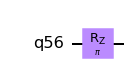

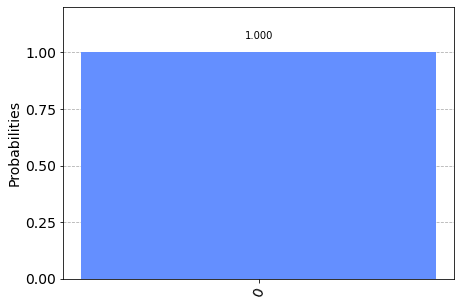

In [14]:
# Rz gate in quantum circuit when theta is pi
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rz(pi, q)
display(qc.draw(output="mpl"))

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by example

#### Example 1
<center><b>Applying Rz gate on |+> where $\theta$ = $\pi$</b></center>
$$Rz(\pi)\ket{+} = \begin{bmatrix} -i & 0   \\ 0 & i \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Rz(\pi)\ket{+} = -i\begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Rz(\pi)\ket{+} = -i\ket{-}$$

![SegmentLocal](bloch_transformations/rz1_gate.gif "segment")

In [15]:
plus_state = np.matrix([[1/sqrt(2)],[1/sqrt(2)]])
print("Initial State  \n{}\n".format(plus_state))

rz_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rz_gate = np.matrix(rz_gate)
print("Rz Gate when theta=pi \n{}\n".format(rz_gate))

output = rz_gate*plus_state
print("Outplut State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

Rz Gate when theta=pi 
[[0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Outplut State 
[[0.-0.70710678j]
 [0.+0.70710678j]]



#### Example 2
<center><b>Applying Rx gate on |-> where $\theta$ = $\pi$</b></center>
$$Rz(\pi)\ket{-} = \begin{bmatrix} -i & 0   \\ 0 & i \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Rz(\pi)\ket{-} = -i\begin{bmatrix} \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Rz(\pi)\ket{-} = -i\ket{+}$$
<br/>

In [16]:
minus_state = np.matrix([[1/sqrt(2)],[-1/sqrt(2)]])
print("|-> \n{}\n".format(minus_state))

rz_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rz_gate = np.matrix(rz_gate)
print("Rz Gate wheb theta=pi \n{}\n".format(rz_gate))

output = rz_gate*minus_state
print("Output State \n{}\n".format(output))

|-> 
[[ 0.70710678]
 [-0.70710678]]

Rz Gate wheb theta=pi 
[[0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Output State 
[[0.-0.70710678j]
 [0.-0.70710678j]]



<center><b>Note:</b></center>
$$Rz(\pi)\ket{+} = -i\ket{-} = \ket{-}\space (Global\space Phase \space can \space be \space ignored)$$
$$Rz(\pi)\ket{-} = -i\ket{+} = \ket{+}\space (Global\space Phase \space can \space be \space ignored)$$
<center><b>Rz($\pi$) is equivalent to Z gate</b></center>

#### Example 3
<center><b>Applying Rz gate on |+> where $\theta$ = $\frac{\pi}{2}$</b></center>
$$Rz(\frac{\pi}{2})\ket{+} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1-i & 0   \\ 0 & 1+i\end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Rz(\frac{\pi}{2})\ket{+} = \frac{1}{{2}}\begin{bmatrix} 1-i \\ 1+i\end{bmatrix}$$
<br/>

![SegmentLocal](bloch_transformations/rz2_gate.gif "segment")

In [17]:
# Rz gate in quantum circuit when theta=pi/2
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rz(pi/2, q)

print("Initial State  \n{}\n".format(plus_state))

rz_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rz_gate = np.matrix(rz_gate)
print("Rz Gate when theta=pi/2 \n{}\n".format(rz_gate))

output = rz_gate*plus_state
print("Output State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

Rz Gate when theta=pi/2 
[[0.707-0.707j 0.   +0.j   ]
 [0.   +0.j    0.707+0.707j]]

Output State 
[[0.49992449-0.49992449j]
 [0.49992449+0.49992449j]]



#### Example 4
<center><b>Applying Rz gate on |+> where $\theta$ = $\frac{\pi}{4}$</b></center>
$$Rz(\frac{\pi}{4})\ket{+} =\begin{bmatrix} 0.9238-i0.3827 & 0   \\ 0 & 0.9238+i0.3827\end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Rz(\frac{\pi}{4})\ket{+} = \frac{1}{\sqrt{2}}\begin{bmatrix} 0.9238-i0.3827 \\ 0.9238+i0.3827\end{bmatrix}$$
<br/>

![SegmentLocal](bloch_transformations/rz3_gate.gif "segment")

In [18]:
# Rx gate in quantum circuit when theta=pi/4
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.rz(pi/4, q)

print("Initial State  \n{}\n".format(plus_state))

rz_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
rz_gate = np.matrix(rz_gate)
print("Rz Gate when theta=pi/4 \n{}\n".format(rz_gate))

output = rz_gate*plus_state
print("Output State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

Rz Gate when theta=pi/4 
[[0.924-0.383j 0.   +0.j   ]
 [0.   +0.j    0.924+0.383j]]

Output State 
[[0.65336667-0.2708219j]
 [0.65336667+0.2708219j]]



<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$Rz(\theta)^\dagger =\begin{bmatrix} cos(\frac{\theta}{2})+isin(\frac{\theta}{2}) & 0   \\ 0 & cos(\frac{\theta}{2})-isin(\frac{\theta}{2}) \end{bmatrix}$$

<center><b>Rz gate is Hermitian when the value of $\theta$ lets $$Rz(\theta) = Rz(\theta)^\dagger$$</b></center>
<br/>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$Rz(\theta)Rz(\theta)^\dagger = \begin{bmatrix} cos(\frac{\theta}{2})-isin(\frac{\theta}{2}) & 0  \\ 0 & cos(\frac{\theta}{2})+isin(\frac{\theta}{2}) \end{bmatrix}\begin{bmatrix} cos(\frac{\theta}{2})+isin(\frac{\theta}{2}) & 0   \\ 0 & cos(\frac{\theta}{2})-isin(\frac{\theta}{2})\end{bmatrix}$$

$$Rz(\theta)Rz(\theta)^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$Rz(\theta)Rz(\theta)^\dagger = I$$
<center><b>Rz($\theta$) gate is Unitary</b></center>

$$Rz(\theta)^\dagger=Rz(\theta)^{-1}$$

## P Gate

<center><b>P($\theta$) Gate</b></center>
<center><b>$\theta$ degree rotation about z axis</b></center>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> P($\theta$) Gate matrix</b></center>
$$P(\theta) =\begin{bmatrix} 1 & 0  \\ 0 & e^{i\theta}  \end{bmatrix}$$
<br/>
<center><b>Derivation</b></center>
$$P(\theta) = e^{\frac{i\theta}{2}}Rz(\theta)$$
<br>

<center><b>P($\pi$) is equivalent to Z gate</b></center>
<center><b>P($\frac{\pi}{2}$) is equivalent to S gate</b></center>
<center><b>P($\frac{\pi}{4}$) is equivalent to T gate</b></center>
<br/>

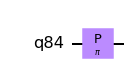

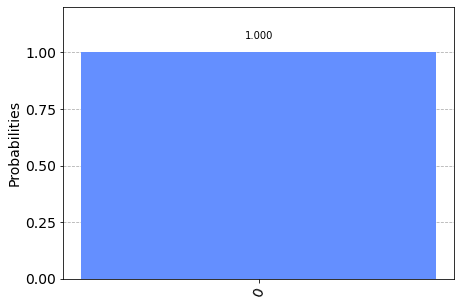

In [19]:
# P gate in quantum circuit when theta=pi
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.p(pi, q)
display(qc.draw(output="mpl"))

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by example

#### Example 1
<center><b>Applying P gate on |+> where $\theta$ = $\pi$</b></center>
$$P(\pi)\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$P(\pi)\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$P(\pi)\ket{+} = \ket{-}$$
<br>

In [20]:
plus_state = np.matrix([[1/sqrt(2)],[1/sqrt(2)]])
print("Initial State  \n{}\n".format(plus_state))

p_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
p_gate = np.matrix(p_gate)
print("P Gate when theta=pi \n{}\n".format(p_gate))

output = p_gate*plus_state
print("Outplut State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

P Gate when theta=pi 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Outplut State 
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]



#### Example 2
<center><b>Applying P gate on |-> where $\theta$ = $\pi$</b></center>
$$P(\pi)\ket{-} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$P(\pi)\ket{-} = \begin{bmatrix} \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$P(\pi)\ket{-} = \ket{+}$$
<br/>

In [21]:
minus_state = np.matrix([[1/sqrt(2)],[-1/sqrt(2)]])
print("Initial State  \n{}\n".format(minus_state))

p_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
p_gate = np.matrix(p_gate)
print("P Gate wheb theta=pi \n{}\n".format(p_gate))

output = p_gate*minus_state
print("Output State \n{}\n".format(output))

Initial State  
[[ 0.70710678]
 [-0.70710678]]

P Gate wheb theta=pi 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Output State 
[[0.70710678+0.j]
 [0.70710678+0.j]]



<center><b>Note:</b></center>
$$Rz(\pi)\ket{+} = \ket{-}$$
$$Rz(\pi)\ket{-} = \ket{+}$$
<center><b>P($\pi$) is  Z gate</b></center>

#### Example 3
<center><b>Applying P gate on |+> where $\theta$ = $\frac{\pi}{2}$</b></center>
$$P(\frac{\pi}{2})\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & i\end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$P(\frac{\pi}{2})\ket{+} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix}$$
<br>

In [22]:
# P gate in quantum circuit when theta=pi/2
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.p(pi/2, q)

print("Initial State  \n{}\n".format(plus_state))

p_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
p_gate = np.matrix(p_gate)
print("P Gate when theta=pi/2 \n{}\n".format(p_gate))

output = p_gate*plus_state
print("Output State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

P Gate when theta=pi/2 
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Output State 
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]



#### Example 4
<center><b>Applying P gate on |+> where $\theta$ = $\frac{\pi}{4}$</b></center>
$$P(\frac{\pi}{4})\ket{+} =\begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}}\end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$P(\frac{\pi}{4})\ket{+} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ e^{\frac{i\pi}{4}}\end{bmatrix}$$
<br/>

In [23]:
# P gate in quantum circuit when theta=pi/4
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.p(pi/4, q)

print("Initial State  \n{}\n".format(plus_state))

p_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
p_gate = np.matrix(p_gate)
print("P Gate when theta=pi/4 \n{}\n".format(p_gate))

output = p_gate*plus_state
print("Output State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

P Gate when theta=pi/4 
[[1.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.707+0.707j]]

Output State 
[[0.70710678+0.j        ]
 [0.49992449+0.49992449j]]



<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$P(\theta)^\dagger =\begin{bmatrix} 1 & 0   \\ 0 & e^{-i\theta} \end{bmatrix}$$

<center><b>P gate is Hermitian when the value of $\theta$ lets $$P(\theta) = P(\theta)^\dagger$$</b></center>
<br/>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$P(\theta)P(\theta)^\dagger = \begin{bmatrix} 1 & 0   \\ 0 & e^{i\theta} \end{bmatrix}\begin{bmatrix} 1 & 0   \\ 0 & e^{-i\theta} \end{bmatrix}$$

$$P(\theta)P(\theta)^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$P(\theta)P(\theta)^\dagger = I$$
<center><b>P($\theta$) gate is Unitary</b></center>

$$P(\theta)^\dagger=P(\theta)^{-1}$$

## S Gate

<center><b>S Gate</b></center>
<center><b>90 degree rotation about z axis</b></center>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> S Gate matrix</b></center>
$$S =\begin{bmatrix} 1 & 0   \\ 0 & i \end{bmatrix}$$
<br>

<center><b>SS = S$^2$ = Z</b></center>
<center><b>Rz($\frac{\pi}{2}$)Rz($\frac{\pi}{2}$) = Rz($\pi$)</b></center>
<center><b>P($\frac{\pi}{2}$)P($\frac{\pi}{2}$) = P($\pi$)</b></center>
<br>

![SegmentLocal](bloch_transformations/s_gate.gif "segment")

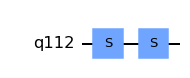

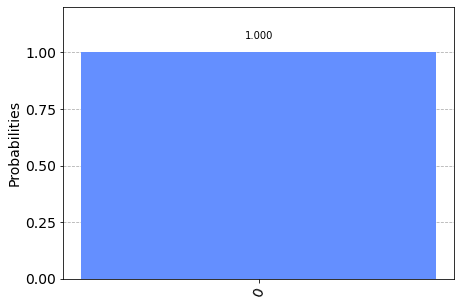

In [24]:
# S gate in quantum circuit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.s(q)
qc.s(q)
display(qc.draw(output="mpl"))

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by example

<center><b>Applying S gate on |+></b></center>
$$S\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & i \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$S\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ i\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$S\ket{+} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix}$$
<br>
<center><b>Applying S gate on $$\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix}$$</b></center>
$$S\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix} = \begin{bmatrix} 1 & 0   \\ 0 & i \end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix}$$

$$S\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix}$$

$$S\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix} = \ket{-}$$
<br>
<center><b>Applying S Gate twice is same as Z Gate</b></center>
$$S\ket{+} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix} = \ket{intermediate}$$
$$S\ket{intermediate} = \ket{+}$$
<br>
<center><b>SS = S$^2$ = Z</b></center>
<center><b>Rz($\frac{\pi}{2}$)Rz($\frac{\pi}{2}$) = Rz($\pi$)</b></center>
<center><b>P($\frac{\pi}{2}$)P($\frac{\pi}{2}$) = P($\pi$)</b></center>
<br>

In [25]:
print("Initial State  \n{}\n".format(plus_state))

ss_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ss_gate = np.matrix(ss_gate)
print("SS Gate \n{}\n".format(ss_gate))

output = ss_gate*plus_state
print("Output State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

SS Gate 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.-0.j]]

Output State 
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]



<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$S^\dagger =\begin{bmatrix} 1 & 0   \\ 0 & -i \end{bmatrix}$$

$$S\space is\space not\space equal\space to\space S^\dagger$$
<center><b>S gate is not Hermitian</b></center>
<br>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br>
$$SS^\dagger = \begin{bmatrix}1 & 0   \\ 0 & i \end{bmatrix}\begin{bmatrix} 1 & 0   \\ 0 & -i \end{bmatrix}$$

$$SS^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$SS^\dagger = I$$
<center><b>S gate is Unitary</b></center>

$$S^\dagger=S^{-1}$$
$$S\space is\space not\space S^{-1}$$

## T Gate

<center><b>T Gate</b></center>
<center><b>45 degree rotation about z axis</b></center>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> T Gate matrix</b></center>
$$T =\begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}$$
<br>
<center><b>Applying T Gate twice is same as S Gate</b></center>
<center><b>TT = T$^2$ = S</b></center>
<center><b>Rz($\frac{\pi}{4}$)Rz($\frac{\pi}{4}$) = Rz($\frac{\pi}{2}$)</b></center>
<center><b>P($\frac{\pi}{4}$)P($\frac{\pi}{4}$) = P($\frac{\pi}{2}$)</b></center>
<br>
<center><b>Applying T Gate 4X is same as Z Gate</b></center>
<center><b>TTTT = T$^4$ = SS = S$^2$ = Z</b></center>
<br>

![SegmentLocal](bloch_transformations/t_gate.gif "segment")

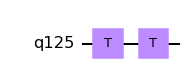

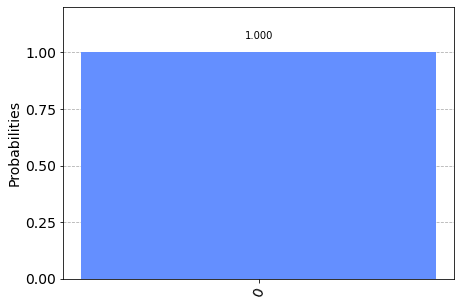

In [26]:
# T gate in quantum circuit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.t(q)
qc.t(q)
display(qc.draw(output="mpl"))

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

<center><b>Applying T gate on |+></b></center>
$$T\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$T\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ e^{\frac{i\pi}{4}}\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$T\ket{+} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{4}}\end{bmatrix}$$
<br>
<center><b>Applying T gate on $$T\ket{+}$$</b></center>
<br>
$$T(T\ket{+}) = \begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{4}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{4}}e^{\frac{i\pi}{4}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{2}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{2}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix} = S\ket{+}$$

<br>
<center><b>Applying T Gate twice is same as S Gate</b></center>
<center><b>TT = T$^2$ = S</b></center>
<center><b>Rz($\frac{\pi}{4}$)Rz($\frac{\pi}{4}$) = Rz($\frac{\pi}{2}$)</b></center>
<center><b>P($\frac{\pi}{4}$)P($\frac{\pi}{4}$) = P($\frac{\pi}{2}$)</b></center>
<br>
<center><b>Applying T Gate 4X is same as Z Gate</b></center>
<center><b>TTTT = T$^4$ = SS = S$^2$ = Z</b></center>
<br>


In [27]:
print("Initial State  \n{}\n".format(plus_state))

tt_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
tt_gate = np.matrix(tt_gate)
print("TT Gate \n{}\n".format(tt_gate))

output = tt_gate*plus_state
print("Output State \n{}\n".format(output))

Initial State  
[[0.70710678]
 [0.70710678]]

TT Gate 
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Output State 
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]



<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$T^\dagger =\begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{-i\pi}{4}} \end{bmatrix}$$

$$T\space is\space not\space equal\space to\space T^\dagger$$
<center><b>T gate is not Hermitian</b></center>
<br>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br>
$$TT^\dagger = \begin{bmatrix}1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{-i\pi}{4}} \end{bmatrix}$$

$$TT^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$TT^\dagger = I$$
<center><b>T gate is Unitary</b></center>

$$T^\dagger=T^{-1}$$
$$T\space is\space not\space T^{-1}$$